In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [90]:
df=pd.read_csv('Social_Network_Ads.csv')
df=df.iloc[2:,2:]

In [91]:
df.sample(5)

,Age,EstimatedSalary,Purchased
275,57,74000,1
325,41,60000,0
43,30,15000,0
342,38,65000,0
356,54,70000,1


 ## Train-test-split

In [104]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_test,y_train= train_test_split(df.drop('Purchased',axis=1),
                                                df['Purchased'],
                                                test_size=0.1,
                                                random_state=0)
X_train.shape,X_test.shape

((358, 2), (40, 2))

In [105]:
y_train.shape

(40,)

## standardscaler

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# Transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [95]:
scaler.mean_

array([3.80143885e+01, 6.80323741e+04])

In [96]:
X_train

,Age,EstimatedSalary
232,40,107000
359,42,54000
142,35,59000
24,46,23000
252,48,134000
...,...,...
325,41,60000
194,28,89000
119,41,59000
49,31,89000


In [97]:
X_train_scaled
# the pandas data is transformed into numpy array when scaled is applied

#it is now converted into  dataframe but we comment out he below code it will turn into numpy array...

array([[ 1.92716004e-01,  1.13446631e+00],
       [ 3.86828501e-01, -4.08525161e-01],
       [-2.92565238e-01, -2.62959928e-01],
       [ 7.75053495e-01, -1.31102960e+00],
       [ 9.69165992e-01,  1.92051857e+00],
       [-8.74902729e-01,  2.02848817e-01],
       [ 1.92716004e-01,  8.63966310e-02],
       [ 7.75053495e-01,  8.14222795e-01],
       [-2.92565238e-01,  1.15509678e-01],
       [ 1.35739099e+00, -1.36925570e+00],
       [-1.55429647e+00, -1.46507742e-01],
       [ 3.86828501e-01,  2.35721426e+00],
       [-1.55429647e+00, -3.79412114e-01],
       [-4.86677735e-01,  2.35721426e+00],
       [-1.39649278e-03, -5.24977347e-01],
       [ 1.26033474e+00, -1.31102960e+00],
       [ 2.89772253e-01,  1.15509678e-01],
       [ 9.69165992e-01, -1.13635132e+00],
       [ 7.75053495e-01,  3.19301004e-01],
       [ 1.74561598e+00,  1.89140552e+00],
       [-1.65135272e+00, -1.51482093e+00],
       [-2.92565238e-01,  2.02848817e-01],
       [-6.80790232e-01,  2.31961864e-01],
       [-1.

In [98]:
# converting X_train_scaled into dataframe 
X_train_scaled=pd.DataFrame (X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame (X_test_scaled,columns=X_test.columns)

In [99]:
np.round (X_train.describe(),1)

,Age,EstimatedSalary
count,278.0,278.0
mean,38.0,68032.4
std,10.3,34410.8
min,18.0,15000.0
25%,31.0,41250.0
50%,37.0,64000.0
75%,46.0,86750.0
max,60.0,150000.0


In [100]:
np.round (X_train_scaled.describe(),1)

# herre we had proof that after applying feature scaling we had changed tha mean to 0, and sd to 1.

,Age,EstimatedSalary
count,278.0,278.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.5
25%,-0.7,-0.8
50%,-0.1,-0.1
75%,0.8,0.5
max,2.1,2.4


## Effect of Scaling

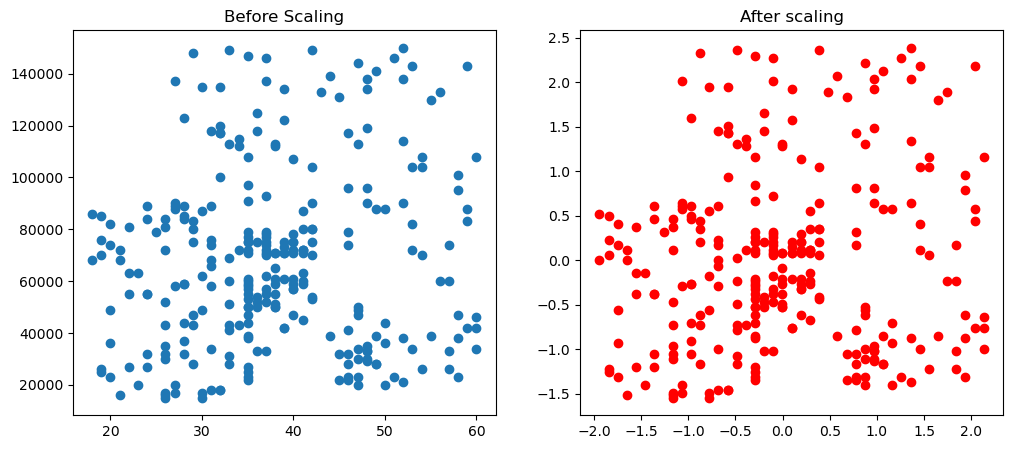

In [72]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After scaling")
plt.show()              

C:\Users\ritik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ritik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ritik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ritik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

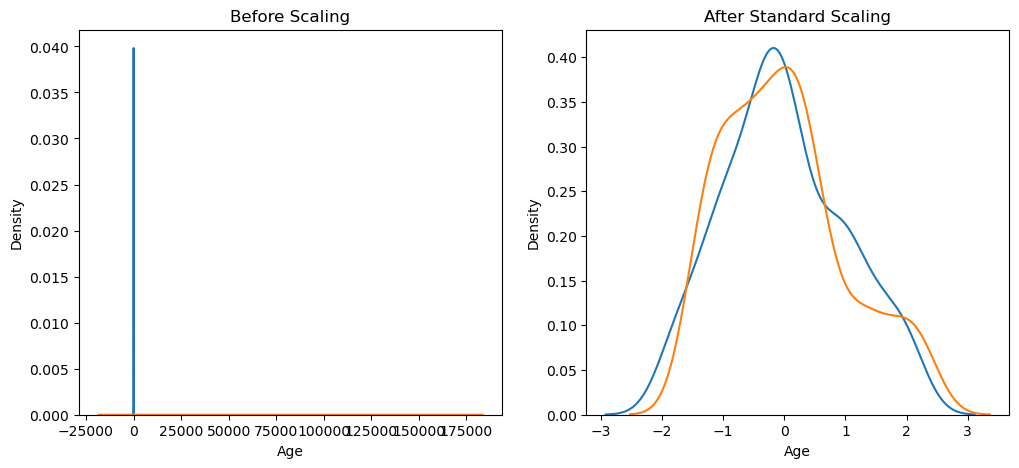

In [73]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

## Comparison of Distributions

C:\Users\ritik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ritik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


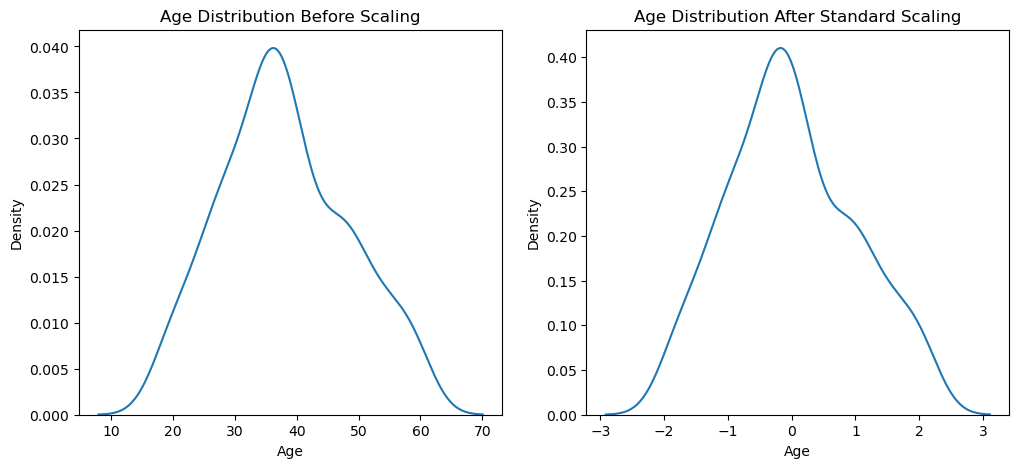

In [74]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

C:\Users\ritik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ritik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


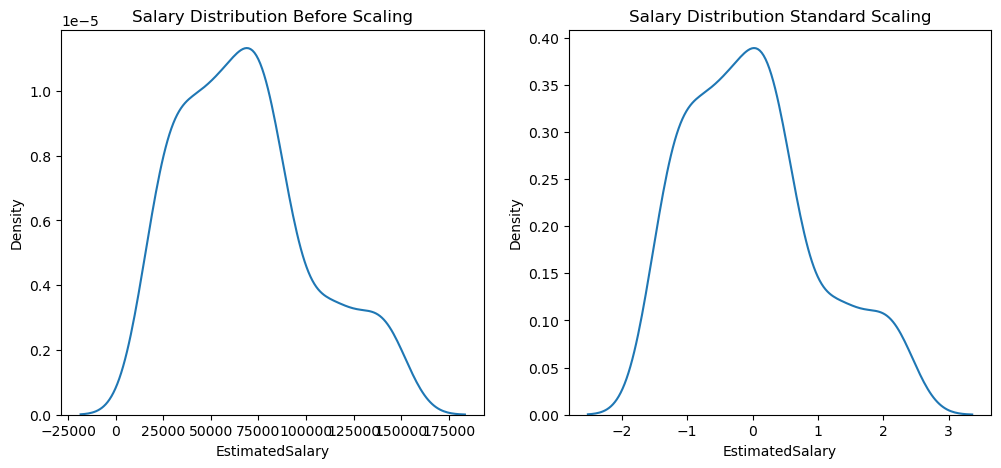

In [75]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

## Why Scaling is important....

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [106]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [358, 40]

In [86]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [107]:
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

NameError: name 'y_pred' is not defined

In [108]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [109]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

ValueError: Number of labels=40 does not match number of samples=358

In [110]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

In [111]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

NameError: name 'y_pred' is not defined

In [112]:
df.describe()

,Age,EstimatedSalary,Purchased
count,398.000000,398.000000,398.000000
mean,37.708543,69994.974874,0.359296
std,10.466474,33995.257854,0.480398
min,18.000000,15000.000000,0.000000
25%,30.000000,43250.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000



## Effects of outliers

In [123]:
import pandas as pd

# Assuming 'df' is already defined
new_data = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 250000, 350000],
    'Purchased': [0, 1, 1]
})

df = pd.concat([df, new_data], ignore_index=True)
# here we had given three outliers here

In [124]:
df

,Age,EstimatedSalary,Purchased
0,26,43000,0
1,27,57000,0
2,19,76000,0
3,27,58000,0
4,27,84000,0
...,...,...,...
399,90,250000,1
400,95,350000,1
401,5,1000,0
402,90,250000,1


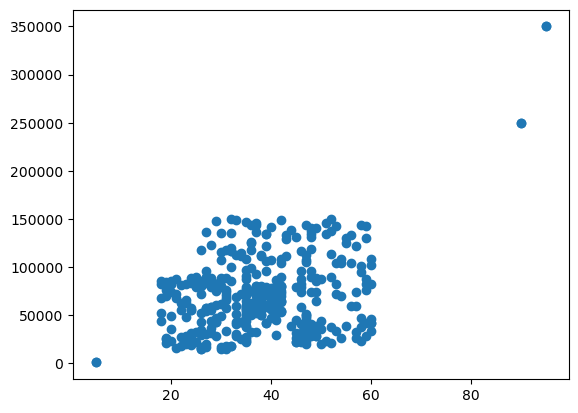

In [125]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (122, 2))

In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [128]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

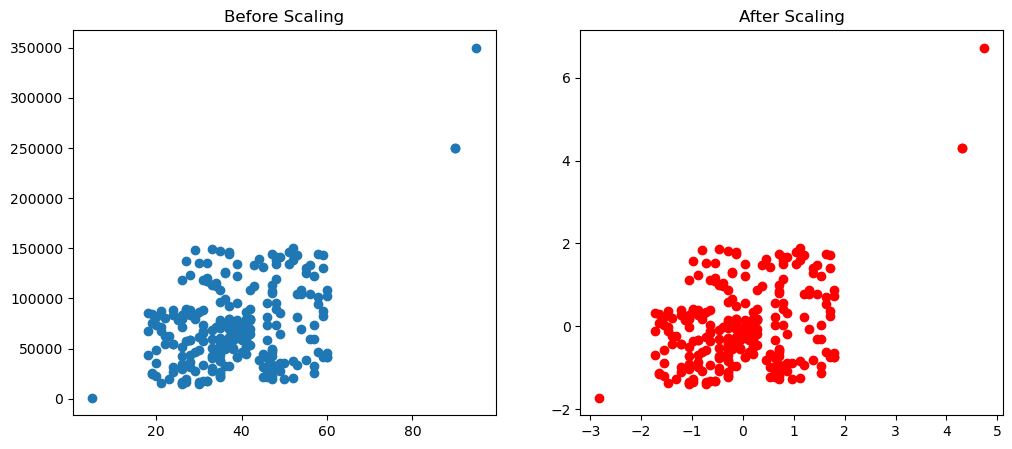

In [129]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()